# Background

The New York City (NYC) Taxi and Limousine Commission (TLC) is the city government agency responsible for regulating and licensing taxis, for-hire vehicles, limousines, commuter vans, and paratransit vehicles in New York City. It was officially established on March 2, 1971.

NYC’s taxi system operates on strict service zone rules, which determine where each type of vehicle is allowed to pick up passengers. Yellow medallion taxis are permitted to pick up street hails anywhere in the city, while green boro taxis can only pick up street hails in the outer boroughs and in northern Manhattan.

# Problem Statement

TLC operates across all five boroughs, but lacks a clear, data-driven understanding of customer preferences, which zones and what time range generate the highest revenue, and which areas contribute to operational inefficiencies. Without zone-level profitability insights, TLC cannot optimize fleet distribution, minimize wasted mileage, or allocate resources efficiently.

The question that we want to address is:

**How do revenue, demand patterns, and customer preferences vary across different time periods and locations in NYC, and what does this reveal about opportunities to improve profit and operational efficiency?**

## Data

To answer the question above, we will analyze the data from NYC TLC. The datasets can be viewed from the official web [NYC TLC Taxi Data](https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page).

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import warnings
warnings.filterwarnings("ignore")

This dataset (NYC TLC Trip Record) gives information about the details of NYC taxi services on January 2023. (20 columns)

- VendorID: A code indicating the LPEP provider that provided the record.

    1 = Creative Mobile Technologies, LLC.

    2 = VeriFone Inc.

- lpep_pickup_datetime: The date and time when the meter was engaged.

- lpep_dropoff_datetime: The date and time when the meter was disengaged.

- passenger_count: The number of passengers in the vehicle.
(*This is a driver-entered value.*)

- trip_distance: The elapsed trip distance in miles was reported by the taximeter.

- PULocationID: TLC Taxi Zone in which the taximeter was engaged.

- DOLocationID: TLC Taxi Zone in which the taximeter was disengaged.

- RateCodeID: The final rate code is in effect at the end of the trip.

    1 = Standard rate

    2 = JFK

    3 = Newark

    4 = Nassau or Westchester

    5 = Negotiated fare

    6 = Group ride

- store_and_fwd_flag: This flag indicates whether the trip record was held in the vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.

    Y = store and forward trip

    N = not a store and forward trip

- payment_type: A numeric code signifying how the passenger paid for the trip.

    1 = Credit card

    2 = Cash

    3 = No charge

    4 = Dispute

    5 = Unknown

    6 = Voided trip

- fare_amount: The time-and-distance fare is calculated by the
meter.

- extra: Miscellaneous extras and surcharges. (*Currently, this only includes the $0.50 and $1 rush hour and overnight charges.*)

- mta_tax: $0.50 MTA tax that is automatically triggered based on the metered rate in use.

- improvement_surcharge: $0.30 improvement surcharge assessed on hailedtrips at the flag drop. The improvement surcharge began being levied in 2015.

- tip_amount: This field is automatically populated for credit card tips. *Cash tips are not included.*

- tolls_amount: The total amount of all tolls paid in the trip.

- ehail_fee: fees charged by the e-hail app provider. 

- total_amount: The total amount charged to passengers. *Does not include cash tips.*

- trip_type: A code indicating whether the trip was a street hail
or a dispatch that is automatically assigned based on the metered rate in use but can be altered by the driver.

    1 = Street-hail

    2 = Dispatch

- congestion_surcharge: A fee drivers charged to passengers because they need to pay to enter a specific, congested area, typically during peak traffic hours.

In [91]:
df = pd.read_csv(r"C:\Users\Zea\Downloads\NYC TLC Trip Record.csv")
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.20,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,NaN,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,NaN,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,NaN,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,NaN,1.0,19.18,NaN,NaN,NaN


#### Another dataset to complement the first dataset.

A complementary dataset (taxi_zone_lookup) to specify more on the PULocationID and DOLocationID. (4 columns)

- LocationID: The same ID used in PULocationID and DOLocationID.

- Borough: The borough which the LocationID is located in.

- Zone: The specific zone area that the taxis covered within the specific borough.

- service_zone: The type of taxis or vehicle that are available in a specific zone.

In [92]:
df_taxi_zone = pd.read_csv(r"C:\Users\Zea\Downloads\taxi_zone_lookup.csv")
df_taxi_zone

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone
...,...,...,...,...
260,261,Manhattan,World Trade Center,Yellow Zone
261,262,Manhattan,Yorkville East,Yellow Zone
262,263,Manhattan,Yorkville West,Yellow Zone
263,264,Unknown,NaN,NaN


## Data Understanding and Cleaning

In [93]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (68211, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14

In [94]:
display(df.describe(), df.describe(include='object'))

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,68211.000000,63887.000000,68211.000000,68211.000000,63887.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,0.0,68211.000000,68211.000000,63887.000000,63877.000000,63887.000000
mean,1.863028,1.117160,98.549735,138.429901,1.315870,8.114852,16.603545,0.825431,0.588340,2.139012,0.169627,NaN,0.951625,21.789377,1.373613,1.021933,0.726748
std,0.343820,1.372913,61.244314,76.761311,0.979054,585.105955,13.470121,1.269904,0.385819,3.052710,1.099789,NaN,0.196875,15.457115,0.508039,0.146465,1.212836
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-70.000000,-2.500000,-0.500000,-10.500000,0.000000,NaN,-1.000000,-71.500000,1.000000,1.000000,-2.750000
25%,2.000000,1.000000,74.000000,74.000000,1.000000,1.110000,9.300000,0.000000,0.500000,0.000000,0.000000,NaN,1.000000,12.900000,1.000000,1.000000,0.000000
50%,2.000000,1.000000,75.000000,138.000000,1.000000,1.850000,13.500000,0.000000,0.500000,1.600000,0.000000,NaN,1.000000,17.900000,1.000000,1.000000,0.000000
75%,2.000000,1.000000,129.000000,219.000000,1.000000,3.210000,19.800000,1.000000,0.500000,3.330000,0.000000,NaN,1.000000,26.150000,2.000000,1.000000,2.750000
max,2.000000,99.000000,265.000000,265.000000,9.000000,120098.840000,490.000000,12.500000,2.750000,222.220000,36.050000,NaN,1.000000,491.000000,5.000000,2.000000,2.750000


,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag
count,68211,68211,63887
unique,66575,66519,2
top,2023-01-07 23:58:06,2023-01-06 00:00:00,N
freq,4,6,63579


In [95]:
pd.set_option('display.max_colwidth', None)
# data uni di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,VendorID,2,"[2, 1]"
1,lpep_pickup_datetime,66575,"[2023-01-01 00:26:10, 2023-01-01 00:51:03, 2023-01-01 00:35:12, 2023-01-01 00:13:14, 2023-01-01 00:33:04, 2023-01-01 00:53:31, 2023-01-01 00:09:14, 2023-01-01 00:11:58, 2023-01-01 00:41:29, 2023-01-01 00:50:32, 2023-01-01 00:16:12, 2023-01-01 00:08:43, 2023-01-01 00:26:32, 2023-01-01 00:18:35, 2023-01-01 00:39:32, 2023-01-01 00:49:34, 2023-01-01 00:10:45, 2023-01-01 00:35:11, 2023-01-01 00:31:06, 2023-01-01 00:14:37, 2023-01-01 00:26:21, 2023-01-01 00:41:56, 2023-01-01 00:32:02, 2023-01-01 00:55:13, 2023-01-01 00:01:31, 2023-01-01 00:22:31, 2023-01-01 00:57:28, 2023-01-01 00:35:21, 2023-01-01 00:52:52, 2023-01-01 00:32:56, 2023-01-01 00:24:01, 2023-01-01 00:46:48, 2023-01-01 00:40:58, 2023-01-01 00:20:23, 2023-01-01 01:49:24, 2023-01-01 00:41:53, 2023-01-01 00:56:26, 2023-01-01 00:33:10, 2023-01-01 00:58:28, 2023-01-01 00:42:49, 2023-01-01 00:48:21, 2023-01-01 00:08:05, 2023-01-01 00:13:47, 2023-01-01 00:16:10, 2023-01-01 00:04:25, 2023-01-01 00:33:38, 2023-01-01 00:46:08, 2023-01-01 01:00:08, 2023-01-01 00:28:04, 2023-01-01 00:23:04, 2023-01-01 00:34:07, 2023-01-01 00:52:03, 2023-01-01 00:25:31, 2023-01-01 00:53:09, 2023-01-01 00:42:37, 2023-01-01 00:39:52, 2023-01-01 00:15:32, 2023-01-01 00:06:48, 2023-01-01 00:57:15, 2023-01-01 00:14:13, 2023-01-01 00:52:48, 2023-01-01 00:34:13, 2023-01-01 00:44:41, 2023-01-01 00:11:12, 2023-01-01 01:44:43, 2023-01-01 01:04:44, 2023-01-01 01:48:11, 2023-01-01 01:11:39, 2023-01-01 01:54:25, 2023-01-01 01:59:10, 2023-01-01 01:22:35, 2023-01-01 01:37:10, 2023-01-01 01:46:22, 2023-01-01 01:59:48, 2023-01-01 01:09:49, 2023-01-01 01:23:35, 2023-01-01 01:53:20, 2023-01-01 01:32:14, 2023-01-01 01:01:05, 2023-01-01 01:34:41, 2023-01-01 01:52:08, 2023-01-01 01:49:28, 2023-01-01 01:03:59, 2023-01-01 01:13:11, 2023-01-01 01:40:06, 2023-01-01 01:33:50, 2023-01-01 01:45:19, 2023-01-01 01:51:29, 2023-01-01 01:34:07, 2023-01-01 01:10:08, 2023-01-01 01:32:17, 2023-01-01 01:48:28, 2023-01-01 01:30:43, 2023-01-01 01:51:10, 2023-01-01 01:09:36, 2023-01-01 01:19:54, 2023-01-01 01:31:10, 2023-01-01 01:42:30, 2023-01-01 00:57:51, 2023-01-01 01:27:36, ...]"
2,lpep_dropoff_datetime,66519,"[2023-01-01 00:37:11, 2023-01-01 00:57:49, 2023-01-01 00:41:32, 2023-01-01 00:19:03, 2023-01-01 00:39:02, 2023-01-01 01:11:04, 2023-01-01 00:26:39, 2023-01-01 00:24:55, 2023-01-01 00:46:26, 2023-01-01 01:13:42, 2023-01-01 00:41:43, 2023-01-01 00:17:08, 2023-01-01 00:45:31, 2023-01-01 00:30:09, 2023-01-01 01:18:06, 2023-01-01 01:08:23, 2023-01-01 00:19:37, 2023-01-01 01:17:35, 2023-01-01 00:42:23, 2023-01-01 00:21:50, 2023-01-01 00:30:26, 2023-01-01 00:46:06, 2023-01-01 00:41:25, 2023-01-01 00:59:47, 2023-01-01 00:16:02, 2023-01-01 00:39:24, 2023-01-01 01:09:31, 2023-01-01 00:53:49, 2023-01-01 01:00:53, 2023-01-01 00:42:53, 2023-01-01 00:32:05, 2023-01-01 01:08:17, 2023-01-01 01:04:32, 2023-01-01 00:24:32, 2023-01-01 01:57:51, 2023-01-01 00:41:58, 2023-01-01 01:14:41, 2023-01-01 00:43:08, 2023-01-01 01:14:46, 2023-01-01 00:51:53, 2023-01-01 01:23:50, 2023-01-01 00:13:26, 2023-01-01 00:25:57, 2023-01-01 00:54:55, 2023-01-01 00:17:50, 2023-01-01 00:38:51, 2023-01-01 00:59:10, 2023-01-01 01:05:46, 2023-01-01 00:43:45, 2023-01-01 23:18:32, 2023-01-01 00:50:01, 2023-01-01 00:57:56, 2023-01-01 00:38:40, 2023-01-01 01:13:35, 2023-01-01 00:47:15, 2023-01-01 00:48:54, 2023-01-01 00:23:03, 2023-01-01 01:08:47, 2023-01-01 01:00:15, 2023-01-01 00:25:43, 2023-01-01 01:21:19, 2023-01-01 00:43:57, 2023-01-01 00:48:26, 2023-01-01 00:38:12, 2023-01-01 01:57:31, 2023-01-01 01:11:23, 2023-01-01 02:05:51, 2023-01-01 01:41:21, 2023-01-01 02:05:19, 2023-01-01 02:11:36, 2023-01-01 01:25:11, 2023-01-01 01:41:30, 2023-01-01 02:04:14, 2023-01-01 02:05:29, 2023-01-01 01:17:55, 2023-01-01 01:53:43, 2023-01-01 02:27:01, 2023-01-01 01:43:55, 2023-01-01 01:13:02, 2023-01-01 02:00:06, 2023-01-01 02:00:57, 2023-01-01 02:13:18, 2023-01-01 01:07:17, 2023-01-01 01:26:01, 2

#### Dataset 2

In [96]:
print(f'Jumlah baris dan kolom di dataset df adalah {df_taxi_zone.shape}')
df_taxi_zone.info()

Jumlah baris dan kolom di dataset df adalah (265, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   LocationID    265 non-null    int64 
 1   Borough       264 non-null    object
 2   Zone          264 non-null    object
 3   service_zone  263 non-null    object
dtypes: int64(1), object(3)
memory usage: 8.4+ KB


In [97]:
display(df_taxi_zone.describe(), df_taxi_zone.describe(include='object'))

,LocationID
count,265.000000
mean,133.000000
std,76.643112
min,1.000000
25%,67.000000
50%,133.000000
75%,199.000000
max,265.000000


,Borough,Zone,service_zone
count,264,264,263
unique,7,261,4
top,Queens,Governor's Island/Ellis Island/Liberty Island,Boro Zone
freq,69,3,205


In [98]:
pd.set_option('display.max_colwidth', None)
# data uni di tiap kolom
listItem = []
for col in df_taxi_zone.columns :
    listItem.append( [col, df_taxi_zone[col].nunique(), df_taxi_zone[col].unique()])

tabel2Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel2Desc

,Column Name,Number of Unique,Unique Sample
0,LocationID,265,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, ...]"
1,Borough,7,"[EWR, Queens, Bronx, Manhattan, Staten Island, Brooklyn, Unknown, nan]"
2,Zone,261,"[Newark Airport, Jamaica Bay, Allerton/Pelham Gardens, Alphabet City, Arden Heights, Arrochar/Fort Wadsworth, Astoria, Astoria Park, Auburndale, Baisley Park, Bath Beach, Battery Park, Battery Park City, Bay Ridge, Bay Terrace/Fort Totten, Bayside, Bedford, Bedford Park, Bellerose, Belmont, Bensonhurst East, Bensonhurst West, Bloomfield/Emerson Hill, Bloomingdale, Boerum Hill, Borough Park, Breezy Point/Fort Tilden/Riis Beach, Briarwood/Jamaica Hills, Brighton Beach, Broad Channel, Bronx Park, Bronxdale, Brooklyn Heights, Brooklyn Navy Yard, Brownsville, Bushwick North, Bushwick South, Cambria Heights, Canarsie, Carroll Gardens, Central Harlem, Central Harlem North, Central Park, Charleston/Tottenville, Chinatown, City Island, Claremont/Bathgate, Clinton East, Clinton Hill, Clinton West, Co-Op City, Cobble Hill, College Point, Columbia Street, Coney Island, Corona, Country Club, Crotona Park, Crotona Park East, Crown Heights North, Crown Heights South, Cypress Hills, Douglaston, Downtown Brooklyn/MetroTech, DUMBO/Vinegar Hill, Dyker Heights, East Chelsea, East Concourse/Concourse Village, East Elmhurst, East Flatbush/Farragut, East Flatbush/Remsen Village, East Flushing, East Harlem North, East Harlem South, East New York, East New York/Pennsylvania Avenue, East Tremont, East Village, East Williamsburg, Eastchester, Elmhurst, Elmhurst/Maspeth, Eltingville/Annadale/Prince's Bay, Erasmus, Far Rockaway, Financial District North, Financial District South, Flatbush/Ditmas Park, Flatiron, Flatlands, Flushing, Flushing Meadows-Corona Park, Fordham South, Forest Hills, Forest Park/Highland Park, Fort Greene, Fresh Meadows, Freshkills Park, Garment District, Glen Oaks, ...]"
3,service_zone,4,"[EWR, Boro Zone, Yellow Zone, Airports, nan]"


### Missing Value

In [99]:
df.isna().sum()/df.shape[0]*100

VendorID                   0.000000
lpep_pickup_datetime       0.000000
lpep_dropoff_datetime      0.000000
store_and_fwd_flag         6.339154
RatecodeID                 6.339154
PULocationID               0.000000
DOLocationID               0.000000
passenger_count            6.339154
trip_distance              0.000000
fare_amount                0.000000
extra                      0.000000
mta_tax                    0.000000
tip_amount                 0.000000
tolls_amount               0.000000
ehail_fee                100.000000
improvement_surcharge      0.000000
total_amount               0.000000
payment_type               6.339154
trip_type                  6.353814
congestion_surcharge       6.339154
dtype: float64

<Axes: >

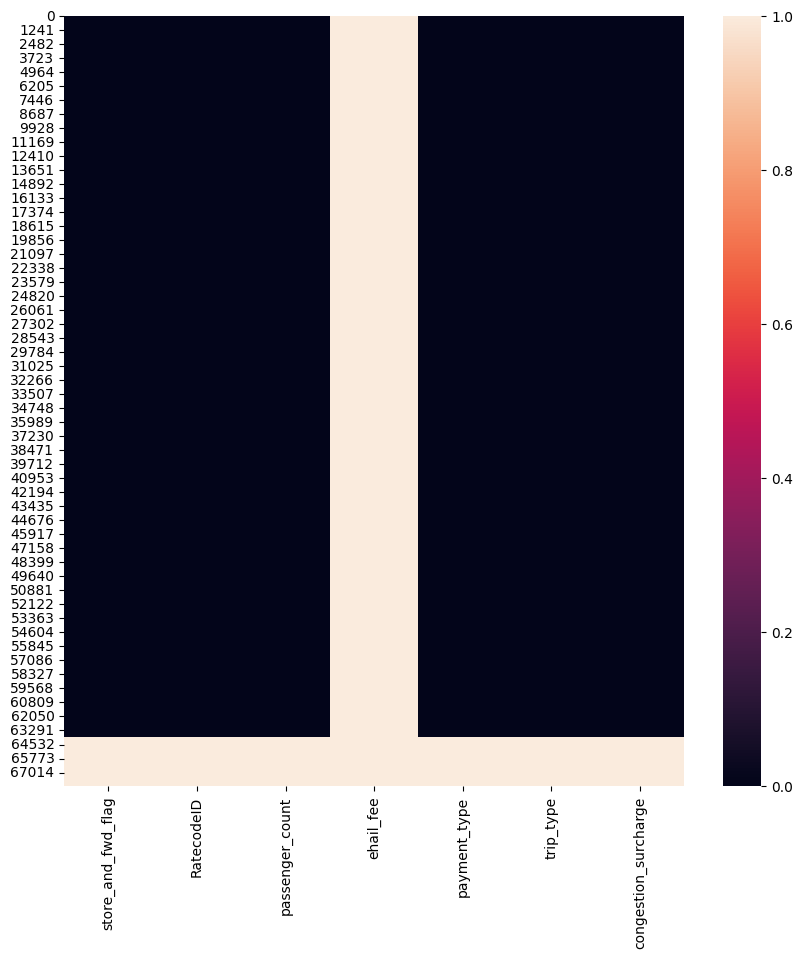

In [100]:
plt.figure(figsize=(10,10))
sns.heatmap(df[['store_and_fwd_flag', 'RatecodeID', 'passenger_count', 'ehail_fee', 'payment_type', 'trip_type', 'congestion_surcharge']].isna())

To summarize the graph above:

- The proportion of missing values in six columns (`store_and_fwd_flag`, `RatecodeID`, `passenger_count`, `payment_type`, `trip_type`, and `congestion_surcharge`) is approximately around 6.3% each while `ehail_fee` has 100% missing values.

There are two ways to solve these missing values:

    1. Remove the rows/columns with the missing values

    2. Fill the missing values

In our case, it's better to remove the `ehail_fee` column and fill the other columns because we can utilize the 93.7% of the non-null values to fill them.

### Handling Missing Values

Within the dataset NYC TLC Trip Record, there are few columns that have missing values and one column (ehail_fee) that has zero values. Therefore, the columns missing values will be filled whereas the column with zero values will be deleted.

#### Removing Missing Values

In [ ]:
# Removing 'ehail_fee' column due to 100% missing values
df.drop(columns=['ehail_fee'], inplace=True)
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.20,1.0,0.5,1.94,0.0,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,1.0,19.18,NaN,NaN,NaN


#### Filling Missing Values

- Columns with missing values: `store_and_fwd_ flag`, `RatecodeID`, `passenger_count`, `payment_type`, `trip_type`, and `congestion_surcharge`.

In [102]:
# Filling this column using mode since the data is categorical.
df['store_and_fwd_flag'].fillna(df['store_and_fwd_flag'].mode()[0], inplace=True)
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.20,1.0,0.5,1.94,0.0,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,N,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,N,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,N,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,N,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,1.0,19.18,NaN,NaN,NaN


In [103]:
# Filling this column using mode since the data is categorical.
df['RatecodeID'].fillna(df['RatecodeID'].mode()[0], inplace=True)
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.20,1.0,0.5,1.94,0.0,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,N,1.0,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,N,1.0,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,N,1.0,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,N,1.0,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,1.0,19.18,NaN,NaN,NaN


In [104]:
# Filling this column using mode since the data is categorical.
df['payment_type'].fillna(df['payment_type'].mode()[0], inplace=True)
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.20,1.0,0.5,1.94,0.0,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,N,1.0,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,1.0,16.70,1.0,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,N,1.0,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,1.0,5.41,1.0,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,N,1.0,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,1.0,21.04,1.0,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,N,1.0,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,1.0,19.18,1.0,NaN,NaN


In [105]:
# Filling this column using mode since the data is categorical.
df['trip_type'].fillna(df['trip_type'].mode()[0], inplace=True)
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.20,1.0,0.5,1.94,0.0,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,N,1.0,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,1.0,16.70,1.0,1.0,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,N,1.0,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,1.0,5.41,1.0,1.0,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,N,1.0,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,1.0,21.04,1.0,1.0,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,N,1.0,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,1.0,19.18,1.0,1.0,NaN


In [106]:
# Checking the data distribution to know which action should be done
df['passenger_count'].describe()

count    63887.000000
mean         1.315870
std          0.979054
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          9.000000
Name: passenger_count, dtype: float64

Since the data distribution is not normal, therefore we use the median value to fill the missing values.

In [107]:
# Filling the missing values with the median value of 'passenger_count' column
df['passenger_count'].fillna(df['passenger_count'].median(), inplace=True)
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.20,1.0,0.5,1.94,0.0,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,N,1.0,49,62,1.0,4070.82,15.70,0.0,0.0,0.00,0.0,1.0,16.70,1.0,1.0,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,N,1.0,10,205,1.0,2.14,4.41,0.0,0.0,0.00,0.0,1.0,5.41,1.0,1.0,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,N,1.0,66,37,1.0,3.44,16.53,0.0,0.0,3.51,0.0,1.0,21.04,1.0,1.0,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,N,1.0,225,189,1.0,3.03,14.98,0.0,0.0,3.20,0.0,1.0,19.18,1.0,1.0,NaN


In [108]:
# Checking the data distribution to know which action should be done
df['congestion_surcharge'].describe()

count    63887.000000
mean         0.726748
std          1.212836
min         -2.750000
25%          0.000000
50%          0.000000
75%          2.750000
max          2.750000
Name: congestion_surcharge, dtype: float64

Since the data distribution is not normal, therefore we use the median value to fill the missing values.

In [109]:
# Filling the missing values with the median value of 'congestion_surcharge' column
df['congestion_surcharge'].fillna(df['congestion_surcharge'].median(), inplace=True)
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.20,1.0,0.5,1.94,0.0,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,N,1.0,49,62,1.0,4070.82,15.70,0.0,0.0,0.00,0.0,1.0,16.70,1.0,1.0,0.00
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,N,1.0,10,205,1.0,2.14,4.41,0.0,0.0,0.00,0.0,1.0,5.41,1.0,1.0,0.00
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,N,1.0,66,37,1.0,3.44,16.53,0.0,0.0,3.51,0.0,1.0,21.04,1.0,1.0,0.00
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,N,1.0,225,189,1.0,3.03,14.98,0.0,0.0,3.20,0.0,1.0,19.18,1.0,1.0,0.00


Adding a new feature:

In [110]:
df['tip_percent'] = df['tip_amount'] / df['fare_amount'] * 100

In [111]:
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,tip_percent
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75,27.046980
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00,24.672897
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.20,1.0,0.5,1.94,0.0,1.0,11.64,1.0,1.0,0.00,26.944444
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00,26.153846
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,N,1.0,49,62,1.0,4070.82,15.70,0.0,0.0,0.00,0.0,1.0,16.70,1.0,1.0,0.00,0.000000
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,N,1.0,10,205,1.0,2.14,4.41,0.0,0.0,0.00,0.0,1.0,5.41,1.0,1.0,0.00,0.000000
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,N,1.0,66,37,1.0,3.44,16.53,0.0,0.0,3.51,0.0,1.0,21.04,1.0,1.0,0.00,21.234120
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,N,1.0,225,189,1.0,3.03,14.98,0.0,0.0,3.20,0.0,1.0,19.18,1.0,1.0,0.00,21.361816


In [112]:
df.isna().sum()

VendorID                  0
lpep_pickup_datetime      0
lpep_dropoff_datetime     0
store_and_fwd_flag        0
RatecodeID                0
PULocationID              0
DOLocationID              0
passenger_count           0
trip_distance             0
fare_amount               0
extra                     0
mta_tax                   0
tip_amount                0
tolls_amount              0
improvement_surcharge     0
total_amount              0
payment_type              0
trip_type                 0
congestion_surcharge      0
tip_percent              77
dtype: int64

In [113]:
df['tip_percent'].fillna(df['tip_percent'] == 0, inplace=True)

We are filling the null values with "0" since the tip were not given by the passengers.

In [114]:
# Checking the data after handling the missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     68211 non-null  object 
 4   RatecodeID             68211 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        68211 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14  improvement_surcharge  68211 non-null  float64
 15  to

In [115]:
# Rechecking the missing values
df.isna().sum()

VendorID                 0
lpep_pickup_datetime     0
lpep_dropoff_datetime    0
store_and_fwd_flag       0
RatecodeID               0
PULocationID             0
DOLocationID             0
passenger_count          0
trip_distance            0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
payment_type             0
trip_type                0
congestion_surcharge     0
tip_percent              0
dtype: int64

This dataset (NYC TLC Trip Record) is cleaned and the missing values are no longer exists.

#### Changing Data Format

In [116]:
# Converting the time of pick up and drop off format
df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'])
df['lpep_dropoff_datetime'] = pd.to_datetime(df['lpep_dropoff_datetime'])
df['trip_distance'] = df['trip_distance'].astype(float)

In [117]:
# Adding new columns for hour and day
df['hour'] = df['lpep_pickup_datetime'].dt.hour
df['day_name'] = df['lpep_pickup_datetime'].dt.day_name()

In [119]:
# Checking tha value of 'trip distance' and 'fare_amount'
df[['trip_distance', 'fare_amount']].describe()

,trip_distance,fare_amount
count,68211.000000,68211.000000
mean,8.114852,16.603545
std,585.105955,13.470121
min,0.000000,-70.000000
25%,1.110000,9.300000
50%,1.850000,13.500000
75%,3.210000,19.800000
max,120098.840000,490.000000


The fare amount column has a negative value, and we need to filter them.

In [120]:
# Filter values based on this parameter
df = df[
    (df['trip_distance'] > 0) &
    (df['trip_distance'] < 100) &
    (df['fare_amount'] > 0)
]

In [121]:
# Changing the data format of 'payment_type'
df['payment_type'] = df['payment_type'].replace({
    1: 'Credit card',
    2: 'Cash',
    3: 'No charge',
    4: 'Dispute',
    5: 'Unknown',
    6: 'Voided trip'
})

In [122]:
# Changing the data format of 'RatecodeID'
df['RatecodeID'] = df['RatecodeID'].replace({
    1.0: 'Standard rate',
    2.0: 'JFK',
    3.0: 'Newark',
    4.0: 'Nassau or Westchester',
    5.0: 'Negotiated fare',
    6.0: 'Group ride'
})

In [123]:
# Changing the data format of 'trip_type'
df['trip_type'] = df['trip_type'].replace({
    1: 'Street-hail',
    2: 'Dispatch'
})

At this point, this dataset is ready to use.

In [124]:
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,tip_percent,hour,day_name
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,Standard rate,166,143,1.0,2.58,14.90,...,4.03,0.0,1.0,24.18,Credit card,Street-hail,2.75,27.04698,0,Sunday
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,Standard rate,24,43,1.0,1.81,10.70,...,2.64,0.0,1.0,15.84,Credit card,Street-hail,0.00,24.672897,0,Sunday
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,Standard rate,41,238,1.0,1.30,6.50,...,1.70,0.0,1.0,10.20,Credit card,Street-hail,0.00,26.153846,0,Sunday
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,Standard rate,41,74,1.0,1.10,6.00,...,0.00,0.0,1.0,8.00,Credit card,Street-hail,0.00,0.0,0,Sunday
5,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,Standard rate,41,262,1.0,2.78,17.70,...,0.00,0.0,1.0,22.95,Cash,Street-hail,2.75,0.0,0,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68205,2,2023-01-31 21:56:00,2023-01-31 22:14:00,N,Standard rate,75,186,1.0,3.92,20.72,...,1.25,0.0,0.3,25.02,Credit card,Street-hail,0.00,6.032819,21,Tuesday
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,N,Standard rate,10,205,1.0,2.14,4.41,...,0.00,0.0,1.0,5.41,Credit card,Street-hail,0.00,0.0,22,Tuesday
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,N,Standard rate,66,37,1.0,3.44,16.53,...,3.51,0.0,1.0,21.04,Credit card,Street-hail,0.00,21.23412,23,Tuesday
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,N,Standard rate,225,189,1.0,3.03,14.98,...,3.20,0.0,1.0,19.18,Credit card,Street-hail,0.00,21.361816,23,Tuesday


Before we clean our data, we have 68211 rows and 20 columns.

Now, we have 64698 rows and 22 columns.

#### Cleaning Dataset 2

This dataset only needs simple data cleaning which involves filling two rows with LocationID 264 and 265.

In [125]:
df_taxi_zone

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone
...,...,...,...,...
260,261,Manhattan,World Trade Center,Yellow Zone
261,262,Manhattan,Yorkville East,Yellow Zone
262,263,Manhattan,Yorkville West,Yellow Zone
263,264,Unknown,NaN,NaN


We're filling the null values with 'Unknown'.

In [126]:
df_taxi_zone.fillna('Unknown', inplace=True)

And change 'Outside of NYC' to 'Unknown' since we don't know where the zone is.

In [127]:
df_taxi_zone['Zone'] = df_taxi_zone['Zone'].replace({
    'Outside of NYC': 'Unknown'
})
df_taxi_zone

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone
...,...,...,...,...
260,261,Manhattan,World Trade Center,Yellow Zone
261,262,Manhattan,Yorkville East,Yellow Zone
262,263,Manhattan,Yorkville West,Yellow Zone
263,264,Unknown,Unknown,Unknown


### Merging Dataset 1 (NYC TLC Trip Record) and Dataset 2 (taxi_zone_lookup)

In this step, we want to merge these two datasets to give better details on the LocationID, Borough, and Zone of NYC.

In [128]:
# Renaming the 'LocationID' column in dataset 2 to match the 'PULocationID' column in dataset 1
df_taxi_zone = df_taxi_zone.rename(columns={'LocationID': 'PULocationID'})

In [129]:
# Merging datasets using left join
df_merged = df.merge(
    df_taxi_zone[['PULocationID', 'Borough', 'Zone']],
    on='PULocationID',
    how='left'
)

In [130]:
# Renaming the 'Borough' and 'Zone' columns in dataset 2 to match the 'PU_Borough' and 'PU_Zone' in dataset 1
df_merged = df_merged.rename(columns={
    'Borough': 'PU_Borough',
    'Zone': 'PU_Zone'
})

In [131]:
# Renaming the 'PULocationID' column in dataset 2 to match the 'DOLocationID' column in dataset 1
df_taxi_zone = df_taxi_zone.rename(columns={'PULocationID': 'DOLocationID'})

In [132]:
# Merging datasets using left join
df_merged = df_merged.merge(df_taxi_zone[['DOLocationID', 'Borough', 'Zone']],
    on='DOLocationID',
    how='left'
)

In [133]:
# Renaming the 'Borough' and 'Zone' columns in dataset 2 to match the 'DO_Borough' and 'DO_Zone' in dataset 1
df_merged = df_merged.rename(columns={
    'Borough': 'DO_Borough',
    'Zone': 'DO_Zone'
})

In [134]:
df_merged

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,payment_type,trip_type,congestion_surcharge,tip_percent,hour,day_name,PU_Borough,PU_Zone,DO_Borough,DO_Zone
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,Standard rate,166,143,1.0,2.58,14.90,...,Credit card,Street-hail,2.75,27.04698,0,Sunday,Manhattan,Morningside Heights,Manhattan,Lincoln Square West
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,Standard rate,24,43,1.0,1.81,10.70,...,Credit card,Street-hail,0.00,24.672897,0,Sunday,Manhattan,Bloomingdale,Manhattan,Central Park
2,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,Standard rate,41,238,1.0,1.30,6.50,...,Credit card,Street-hail,0.00,26.153846,0,Sunday,Manhattan,Central Harlem,Manhattan,Upper West Side North
3,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,Standard rate,41,74,1.0,1.10,6.00,...,Credit card,Street-hail,0.00,0.0,0,Sunday,Manhattan,Central Harlem,Manhattan,East Harlem North
4,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,Standard rate,41,262,1.0,2.78,17.70,...,Cash,Street-hail,2.75,0.0,0,Sunday,Manhattan,Central Harlem,Manhattan,Yorkville East
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64693,2,2023-01-31 21:56:00,2023-01-31 22:14:00,N,Standard rate,75,186,1.0,3.92,20.72,...,Credit card,Street-hail,0.00,6.032819,21,Tuesday,Manhattan,East Harlem South,Manhattan,Penn Station/Madison Sq West
64694,2,2023-01-31 22:40:00,2023-01-31 22:48:00,N,Standard rate,10,205,1.0,2.14,4.41,...,Credit card,Street-hail,0.00,0.0,22,Tuesday,Queens,Baisley Park,Queens,Saint Albans
64695,2,2023-01-31 23:46:00,2023-02-01 00:02:00,N,Standard rate,66,37,1.0,3.44,16.53,...,Credit card,Street-hail,0.00,21.23412,23,Tuesday,Brooklyn,DUMBO/Vinegar Hill,Brooklyn,Bushwick South
64696,2,2023-01-31 23:01:00,2023-01-31 23:19:00,N,Standard rate,225,189,1.0,3.03,14.98,...,Credit card,Street-hail,0.00,21.361816,23,Tuesday,Brooklyn,Stuyvesant Heights,Brooklyn,Prospect Heights


#### Rearranging the Borough and Zone next to the LocationID

In [135]:
columns = list(df_merged.columns)
pu_index = columns.index('PULocationID')
for col in ['PU_Borough', 'PU_Zone']:
    columns.insert(pu_index + 1, columns.pop(columns.index(col)))

do_index = columns.index('DOLocationID')
for col in ['DO_Borough', 'DO_Zone']:
    columns.insert(do_index + 1, columns.pop(columns.index(col)))

In [136]:
df_merged = df_merged[columns]

In [137]:
# Removing duplicates (if any)
df_merged.drop_duplicates(inplace=True)
df_merged


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,PU_Zone,PU_Borough,DOLocationID,DO_Zone,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,tip_percent,hour,day_name
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,Standard rate,166,Morningside Heights,Manhattan,143,Lincoln Square West,...,4.03,0.0,1.0,24.18,Credit card,Street-hail,2.75,27.04698,0,Sunday
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,Standard rate,24,Bloomingdale,Manhattan,43,Central Park,...,2.64,0.0,1.0,15.84,Credit card,Street-hail,0.00,24.672897,0,Sunday
2,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,Standard rate,41,Central Harlem,Manhattan,238,Upper West Side North,...,1.70,0.0,1.0,10.20,Credit card,Street-hail,0.00,26.153846,0,Sunday
3,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,Standard rate,41,Central Harlem,Manhattan,74,East Harlem North,...,0.00,0.0,1.0,8.00,Credit card,Street-hail,0.00,0.0,0,Sunday
4,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,Standard rate,41,Central Harlem,Manhattan,262,Yorkville East,...,0.00,0.0,1.0,22.95,Cash,Street-hail,2.75,0.0,0,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64693,2,2023-01-31 21:56:00,2023-01-31 22:14:00,N,Standard rate,75,East Harlem South,Manhattan,186,Penn Station/Madison Sq West,...,1.25,0.0,0.3,25.02,Credit card,Street-hail,0.00,6.032819,21,Tuesday
64694,2,2023-01-31 22:40:00,2023-01-31 22:48:00,N,Standard rate,10,Baisley Park,Queens,205,Saint Albans,...,0.00,0.0,1.0,5.41,Credit card,Street-hail,0.00,0.0,22,Tuesday
64695,2,2023-01-31 23:46:00,2023-02-01 00:02:00,N,Standard rate,66,DUMBO/Vinegar Hill,Brooklyn,37,Bushwick South,...,3.51,0.0,1.0,21.04,Credit card,Street-hail,0.00,21.23412,23,Tuesday
64696,2,2023-01-31 23:01:00,2023-01-31 23:19:00,N,Standard rate,225,Stuyvesant Heights,Brooklyn,189,Prospect Heights,...,3.20,0.0,1.0,19.18,Credit card,Street-hail,0.00,21.361816,23,Tuesday


In [138]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64698 entries, 0 to 64697
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               64698 non-null  int64         
 1   lpep_pickup_datetime   64698 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  64698 non-null  datetime64[ns]
 3   store_and_fwd_flag     64698 non-null  object        
 4   RatecodeID             64698 non-null  object        
 5   PULocationID           64698 non-null  int64         
 6   PU_Zone                64698 non-null  object        
 7   PU_Borough             64698 non-null  object        
 8   DOLocationID           64698 non-null  int64         
 9   DO_Zone                64698 non-null  object        
 10  DO_Borough             64698 non-null  object        
 11  passenger_count        64698 non-null  float64       
 12  trip_distance          64698 non-null  float64       
 13  f

In [139]:
# Check whether theres null values
df_merged.isnull().values.any()

np.False_

False: no null values present in the dataset

## Cleaned Data

We have cleaned our data, and this how it looks like:

In [140]:
df_merged

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,PU_Zone,PU_Borough,DOLocationID,DO_Zone,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,tip_percent,hour,day_name
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,Standard rate,166,Morningside Heights,Manhattan,143,Lincoln Square West,...,4.03,0.0,1.0,24.18,Credit card,Street-hail,2.75,27.04698,0,Sunday
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,Standard rate,24,Bloomingdale,Manhattan,43,Central Park,...,2.64,0.0,1.0,15.84,Credit card,Street-hail,0.00,24.672897,0,Sunday
2,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,Standard rate,41,Central Harlem,Manhattan,238,Upper West Side North,...,1.70,0.0,1.0,10.20,Credit card,Street-hail,0.00,26.153846,0,Sunday
3,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,Standard rate,41,Central Harlem,Manhattan,74,East Harlem North,...,0.00,0.0,1.0,8.00,Credit card,Street-hail,0.00,0.0,0,Sunday
4,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,Standard rate,41,Central Harlem,Manhattan,262,Yorkville East,...,0.00,0.0,1.0,22.95,Cash,Street-hail,2.75,0.0,0,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64693,2,2023-01-31 21:56:00,2023-01-31 22:14:00,N,Standard rate,75,East Harlem South,Manhattan,186,Penn Station/Madison Sq West,...,1.25,0.0,0.3,25.02,Credit card,Street-hail,0.00,6.032819,21,Tuesday
64694,2,2023-01-31 22:40:00,2023-01-31 22:48:00,N,Standard rate,10,Baisley Park,Queens,205,Saint Albans,...,0.00,0.0,1.0,5.41,Credit card,Street-hail,0.00,0.0,22,Tuesday
64695,2,2023-01-31 23:46:00,2023-02-01 00:02:00,N,Standard rate,66,DUMBO/Vinegar Hill,Brooklyn,37,Bushwick South,...,3.51,0.0,1.0,21.04,Credit card,Street-hail,0.00,21.23412,23,Tuesday
64696,2,2023-01-31 23:01:00,2023-01-31 23:19:00,N,Standard rate,225,Stuyvesant Heights,Brooklyn,189,Prospect Heights,...,3.20,0.0,1.0,19.18,Credit card,Street-hail,0.00,21.361816,23,Tuesday


Now, we have 64698 rows and 26 columns after we merged previous two datasets.

## Data Analysis

We will conduct a few necessary analyses to address our problem statement including: `revenue analysis`, `demand pattern analysis`, `customer preference analysis`, `geographic analysis`, and `correlation analysis`.

### 1. Revenue Analysis

First, let's see how the revenue varies per boroughs.

In [170]:
revenue_per_borough = (
    df_merged.groupby('PU_Borough')['total_amount']
    .sum()
    .reset_index()
    .sort_values('total_amount', ascending=False)
)
revenue_per_borough

,PU_Borough,total_amount
2,Manhattan,796001.03
3,Queens,365064.99
1,Brooklyn,223142.23
0,Bronx,21293.62
5,Unknown,2377.98
4,Staten Island,228.41


- To answer the question: 

    **"How is the total revenue vary in each boroughs?"**

    - From here, we know that Manhattan contributes the most to the total revenue.

Next, Hourly revenue is calculated to know how much is the total revenue per time range in NYC.

In [142]:
hourlyRevenue = df_merged.groupby('hour')['total_amount'].sum().reset_index()
hourlyRevenue

,hour,total_amount
0,0,22523.30
1,1,19063.80
2,2,14574.47
3,3,13657.19
4,4,10343.67
5,5,10910.96
6,6,20351.09
7,7,52582.94
8,8,67409.01
9,9,72081.16


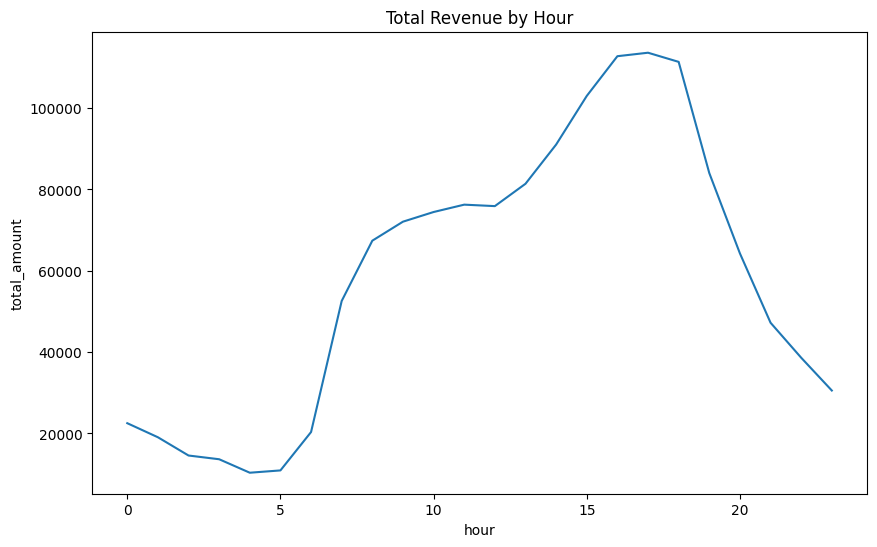

In [143]:
plt.figure(figsize=(10,6))
sns.lineplot(data=hourlyRevenue, x='hour', y='total_amount')
plt.title("Total Revenue by Hour")
plt.show()

- This analysis addresses the question: 

    **"At what time of day do TLC make the most money?"**

    - We can imply that the total revenue has an upward trend overall. Specifically, during evening time (4PM to 6PM) generate the highest total revenue with more than $100,000.

Daily revenue is calculated to know how much is the total revenue each day (Monday to Sunday).

In [144]:
day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

df_merged['day_name'] = pd.Categorical(df_merged['day_name'], categories=day_order, ordered=True)

In [145]:
dailyRevenue = (
    df_merged.groupby('day_name')['total_amount']
    .sum().reset_index().sort_values('day_name')
    )
dailyRevenue

,day_name,total_amount
0,Monday,204044.81
1,Tuesday,233533.42
2,Wednesday,202130.81
3,Thursday,214945.77
4,Friday,208361.36
5,Saturday,174211.33
6,Sunday,170880.76


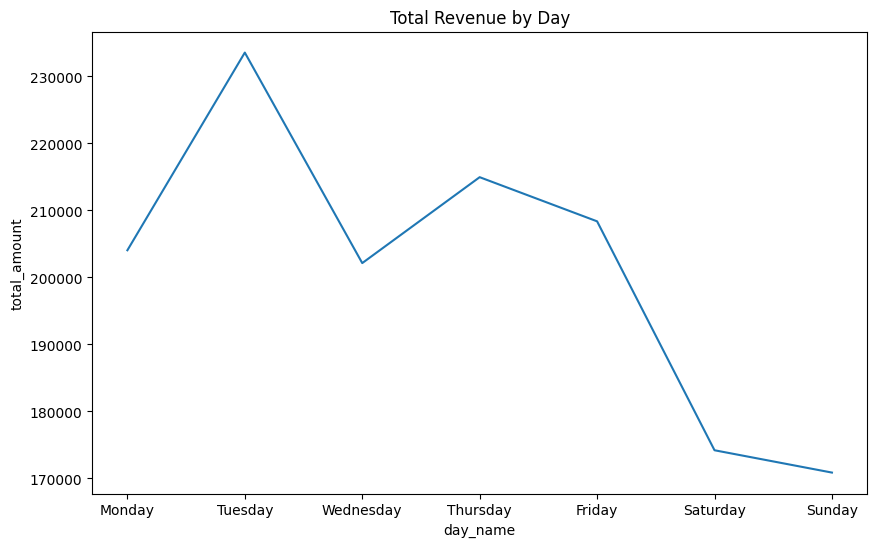

In [174]:
plt.figure(figsize=(10,6))
sns.lineplot(data=dailyRevenue, x='day_name', y='total_amount')
plt.title("Total Revenue by Day")
plt.show()

- This analysis addresses the question:
    
     **"How does revenue vary across different days of the week?"**

     - The data shows that the total revenue by day has a downward trend where the total revenue on Tuesday yield the highest total revenue by $233533.42.

Next, we use scatter plot to know what kind of relationship does the distance and total revenue has.

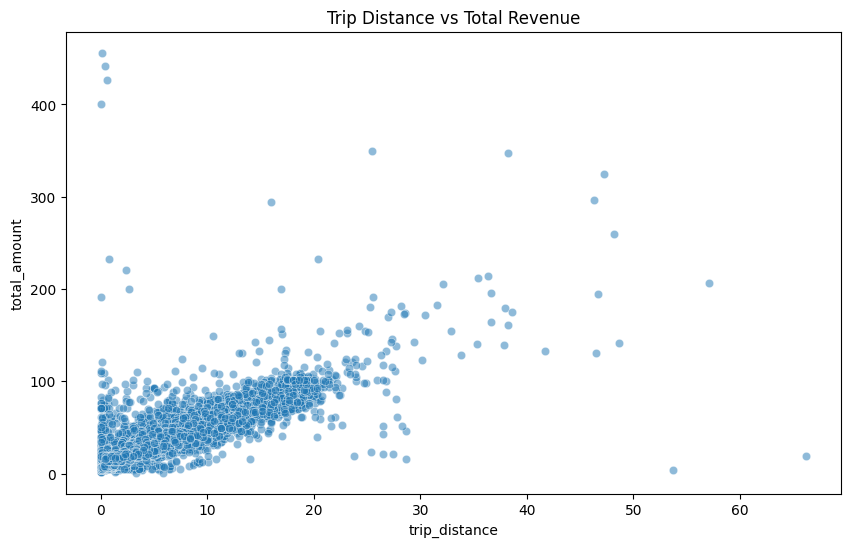

In [147]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_merged, x='trip_distance', y='total_amount', alpha=0.5)
plt.title("Trip Distance vs Total Revenue")
plt.show()

- The plot tells us that they have a positive relationship which means the longer the distance, the higher the total revenue.

### 2. Demand Pattern Analysis

Firstly, we want to know how is the taxi demand based on the time range.

In [148]:
hourly_demand = df.groupby('hour')['passenger_count'].count().reset_index()
hourly_demand

,hour,passenger_count
0,0,1056
1,1,835
2,2,598
3,3,532
4,4,393
5,5,380
6,6,919
7,7,2516
8,8,3066
9,9,3335


We are using histogram to see the demand pattern over time.

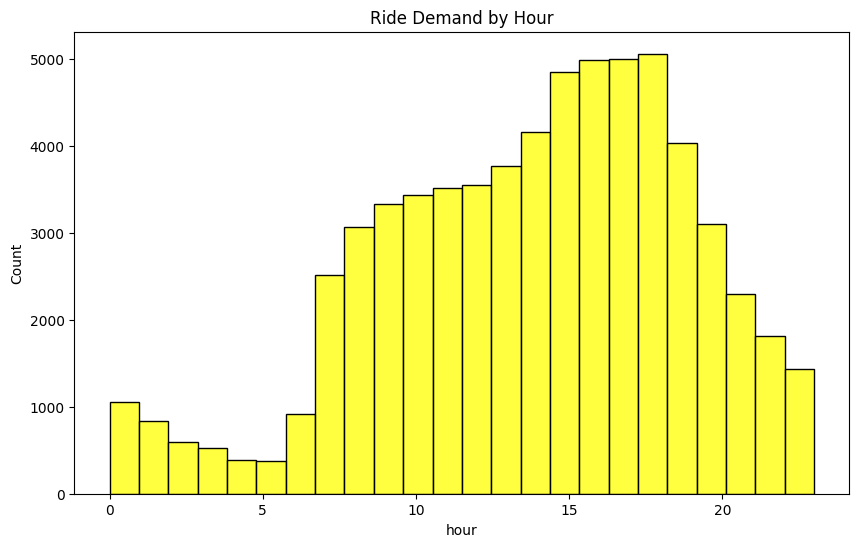

In [149]:
plt.figure(figsize=(10,6))
sns.histplot(df_merged['hour'], bins=24, color='yellow')
plt.title("Ride Demand by Hour")
plt.show()

- This analysis addresses the question: 

    **"What time range yields the highest demand?"**

    - From the plot, we can interpret that the highest taxi demand is between 4 PM and 6 PM.

Next, we want to know how is the taxi demand by borough.

In [150]:
borough_demand = (
    df_merged.groupby('PU_Borough')['passenger_count']
    .count().sort_values(ascending=False).reset_index()
    )
borough_demand

,PU_Borough,passenger_count
0,Manhattan,38621
1,Queens,16649
2,Brooklyn,8476
3,Bronx,888
4,Unknown,55
5,Staten Island,9


Now, let's delve deeper into the taxi demand by zone.

In [151]:
zone_demand = (
    df_merged.groupby('PU_Zone')['passenger_count']
    .count().sort_values(ascending=False).reset_index()
    )
zone_demand.head(10)

,PU_Zone,passenger_count
0,East Harlem North,13010
1,East Harlem South,8932
2,Central Harlem,3953
3,Morningside Heights,3846
4,Forest Hills,3703
5,Central Park,2849
6,Elmhurst,2844
7,Fort Greene,2136
8,Washington Heights South,1781
9,Astoria,1772


- This findings also allows us to answer the question of **which zones that are high in demand**.

From this table, we can target these top 10 zones to improve profit and efficient taxi distribution.

### 3. Customer Preference Analysis

First, let's see what type of payment does the customers prefer.

In [152]:
payment_preference = (
    df_merged.groupby(['hour', 'payment_type']).size()
    .reset_index(name='count')
    )
payment_preference

,hour,payment_type,count
0,0,Cash,398
1,0,Credit card,652
2,0,No charge,6
3,1,Cash,292
4,1,Credit card,540
...,...,...,...
87,22,No charge,3
88,23,Cash,486
89,23,Credit card,952
90,23,Dispute,1


From the data above, we want to summarise the information that includes only the dominant payment type each hour.

In [153]:
dominant_payment = (
    payment_preference.loc[
        payment_preference.groupby('hour')['count'].idxmax()
    ]
    .sort_values('hour')
)
dominant_payment

,hour,payment_type,count
1,0,Credit card,652
4,1,Credit card,540
8,2,Credit card,355
12,3,Credit card,290
16,4,Credit card,225
20,5,Credit card,227
23,6,Credit card,669
27,7,Credit card,1826
30,8,Credit card,2255
33,9,Credit card,2229


<Axes: xlabel='hour'>

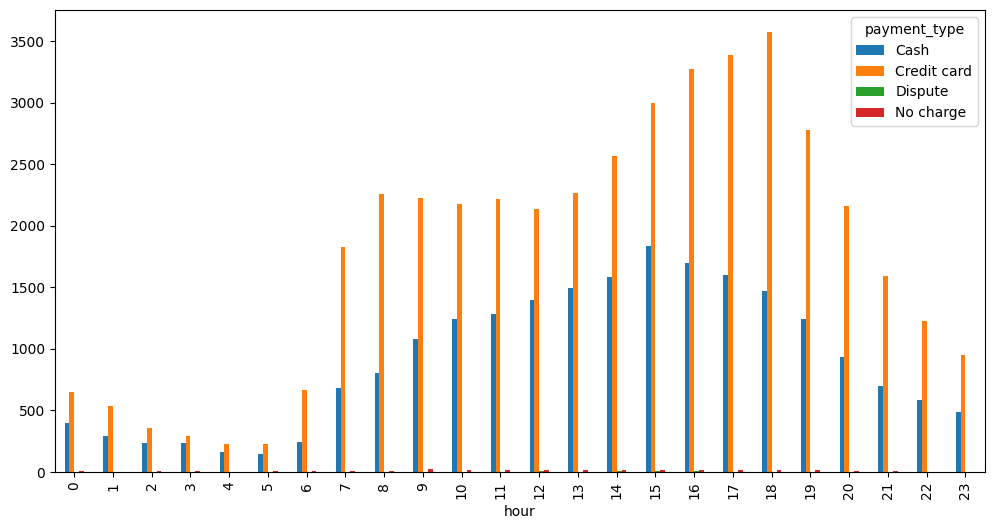

In [154]:
df_merged['hour'] = df_merged['lpep_pickup_datetime'].dt.hour
df_merged.groupby(['hour', 'payment_type']).size().unstack().plot(kind='bar', figsize=(12,6))

In [155]:
# check payment type proportion (%)
df_merged['payment_type'].value_counts(normalize=True) * 100

payment_type
Credit card    65.802652
Cash           33.773842
No charge       0.347770
Dispute         0.075736
Name: proportion, dtype: float64

- The analysis above answers the question: 

    **"How do customer payment preferences vary across times of the day?"**

    - From here, we know that most passengers paid with credit cards regardless of time.

Next, let's find out the average tip taxi drivers obtained each hour.

In [156]:
tip_by_hour = df_merged.groupby('hour')['tip_percent'].mean()
tip_by_hour

hour
0     12.359305
1     15.273129
2     12.835876
3      16.15292
4     14.235627
5     12.600555
6     14.181489
7     14.527869
8     14.032259
9     13.261796
10    12.841027
11    13.112215
12    12.296778
13    12.291567
14    12.696398
15    12.488244
16    14.933154
17    15.639377
18    16.733498
19    16.194174
20    15.435382
21    15.123006
22     14.96183
23    13.722147
Name: tip_percent, dtype: object

The highest amount of tips were obtained between 4 PM and 6 PM. This finding is aligned with the trend of total revenue and passenger count each hour.

### 4. Geographic Analysis

In this analysis, we want to know how many trips are conducted through the zones in NYC.

In [157]:
pickup_rank_df = (
    df_merged.groupby(['PU_Borough', 'PU_Zone'])
    .size()
    .reset_index(name='trip_count')
    .sort_values('trip_count', ascending=False)
)
pickup_rank_df.head(10)

,PU_Borough,PU_Zone,trip_count
104,Manhattan,East Harlem North,13010
105,Manhattan,East Harlem South,8932
101,Manhattan,Central Harlem,3953
116,Manhattan,Morningside Heights,3846
145,Queens,Forest Hills,3703
103,Manhattan,Central Park,2849
140,Queens,Elmhurst,2844
73,Brooklyn,Fort Greene,2136
123,Manhattan,Washington Heights South,1781
128,Queens,Astoria,1772


In [158]:
dropoff_rank_df = (
    df_merged.groupby(['DO_Borough', 'DO_Zone'])
    .size()
    .reset_index(name='trip_count')
    .sort_values('trip_count', ascending=False)
)
dropoff_rank_df.head(10)

,DO_Borough,DO_Zone,trip_count
116,Manhattan,East Harlem South,3423
115,Manhattan,East Harlem North,3295
159,Manhattan,Upper East Side North,2734
108,Manhattan,Central Harlem,2562
161,Manhattan,Upper West Side North,2310
109,Manhattan,Central Harlem North,2275
145,Manhattan,Morningside Heights,2233
169,Manhattan,Yorkville West,1545
190,Queens,Forest Hills,1524
162,Manhattan,Upper West Side South,1474


In [159]:
# trip frequency per borough
df_merged['PU_Borough'].value_counts()

PU_Borough
Manhattan        38621
Queens           16649
Brooklyn          8476
Bronx              888
Unknown             55
Staten Island        9
Name: count, dtype: int64

- This analysis answers the question: 

    **"Which borough are the most profitable?"**

    - The finding shows that taxi drivers pick up and drop off passengers mostly in **Manhattan**.

In [160]:
# Average fare per borough
df_merged.groupby('PU_Borough')['fare_amount'].mean()

PU_Borough
Bronx            20.822646
Brooklyn         20.645260
Manhattan        14.956733
Queens           17.524639
Staten Island    19.244444
Unknown          38.728364
Name: fare_amount, dtype: float64

### 5. Correlation Analysis

**Correlation between total revenue, trip distance, and tip amount:**

In [161]:
df_merged[['total_amount','trip_distance','tip_amount']].corr()


,total_amount,trip_distance,tip_amount
total_amount,1.000000,0.865915,0.553499
trip_distance,0.865915,1.000000,0.372600
tip_amount,0.553499,0.372600,1.000000


- The correlation between total revenue and trip distance (0.87): **strong positive correlation**
    - This means the longer the trips, the higher the total revenue.

- The correlation between total revenue and tip amount (0.55): **moderate positive correlation**
    - This means higher fares tend to get higher tip amount.
    - More service time = more tipping chance.

- The correlation between trip distance and tip amount (0.37): **weak to moderate positive correlation**
    - Longer trips may encourage tipping, but not as strong as revenue-trip relationship.
    - This may because tipping behavior varies among passengers.


**Correlation between time range and total revenue:**

In [162]:
df_merged[['hour', 'total_amount']].corr()

,hour,total_amount
hour,1.000000,-0.024797
total_amount,-0.024797,1.000000


The correlation between time range and total revenue (-0.02): **no relationship**
- This means the revenue is not determined by the time range.

### 6. Statistical Analysis

**Kruskal-Wallis Test**

In [163]:
# Do borough differ significantly in total revenue?
from scipy.stats import kruskal

groups = [df_merged[df_merged['PU_Borough'] == b]['total_amount']
          for b in df_merged['PU_Borough'].unique()]

kruskal(*groups)

KruskalResult(statistic=np.float64(1107.3335835467942), pvalue=np.float64(3.4512792219312796e-237))

H0: There is no significant difference in total revenue across NYC boroughs.

H1: At least one borough has a significantly different total revenue.

Since the p-value < 0.05, the H0 is rejected.

**Interpretation: Total revenue is significantly different across boroughs.**

**One-way ANOVA Test**

In [164]:
# Does hour affect revenue?
from scipy.stats import f_oneway

groups = [df_merged[df_merged['hour']==h]['total_amount'] for h in range(24)]
f_oneway(*groups)

F_onewayResult(statistic=np.float64(13.169738712721147), pvalue=np.float64(1.6092597565569493e-50))

H0: There is no significant difference in total revenue between different hours of the day.

H1: At least one hour has significantly different revenue compared to others.

Since the p-value < 0.05, the H0 is rejected.

**Interpretation: Revenue does differ significantly across hours of the day.**

Even though there are no correlation between hour and total revenue in correlation analysis previously, this hypothesis test demonstrates that total daily revenue changes significantly by hour.

    - Due to demand spikes, taxi drivers get more trips.

## Conclusion & Recommendations

Based on the exploratory data analysis that we've done, several consistent and statistically significant patterns were identified:

1. **Revenue varies significantly by borough**

- A Kruskal–Wallis test confirmed that total revenue differs across boroughs (p < 0.05).
- Manhattan consistently generates the highest revenue per trip and the highest total trip volume.
- Queens shows moderate revenue, while Brooklyn, Bronx, and Staten Island contribute noticeably lower revenue levels.

2. **Revenue varies significantly by hour of the day**

- Hourly revenue differences are strongly significant (p < 0.05).
- Although trip value per trip does not strongly correlate with hour, the number of trips varies dramatically across the day. This creates revenue peaks during morning and evening rush hours periods.

3. **Tipping Behaviour by Hour of the Day**

- Higher tipping patterns during late evenings (4 PM - 6 PM), passengers may be:
    - Less rushed

    - In a better mood after work

    - More willing to reward good service

    - Taking medium-length trips, which often result in higher absolute tip amounts

4. **Trip distance is positively related to total revenue but only mildly to tips**

- Correlation analysis shows that longer trips produce higher fares, but tip amount is not strongly linked to distance, suggesting that tipping behavior is influenced more by customer profile.

5. **Demand patterns differ across time and location**

- High-demand and high-revenue zones cluster in Manhattan.
- Zone-level analysis also shows several high-performing hotspots, whereas suburban boroughs show lower and more dispersed demand.

### Recommedations

1. **Prioritize resource allocation to high-revenue boroughs and zones**

- TLC can increase driver availability and dispatch efficiency in Manhattan and key Queens zones, use borough-level revenue metrics to guide fleet distribution, and develop zone-specific policies to support high-demand areas.

2. **Implement hour-based operational optimization**

- TLC can reinforce driver supply during peak revenue hours (rush hours and evenings), consider incentive programs (driver bonuses, reduced idle time) for peak periods, and reduce operational costs during low-demand hours (for example, shift adjustments).

3. **Enhance driver efficiency through data-informed routing**

- TLC can provide drivers with real-time information about high-demand zones, reduce empty miles by strategically positioning available drivers before peaks, and even explore AI-driven dispatch routing to minimize fuel and time costs.

**In conclusion, this analysis provides clear evidence that profitability in NYC TLC taxi operations is influenced by geography, time, and customer behavior. By reallocating resources to high-performing areas and optimizing peak-hour operations, TLC can enhance both profitability and cost efficiency while improving overall service quality.**